In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
%matplotlib inline
plt.style.use('default')

In [2]:
churn_data = pd.read_csv('data/churn.csv')
#churn_data = pd.read_csv('https://raw.githubusercontent.com/oresh247/SF_DS_PYTHON/main/SF/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5%209.11.%20%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C%2013%20(HW-01)/data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Номер строки таблицы, это лишняя информация

In [3]:
churn_data = churn_data.drop(['RowNumber'], axis=1)

ЗАДАНИЯ

9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

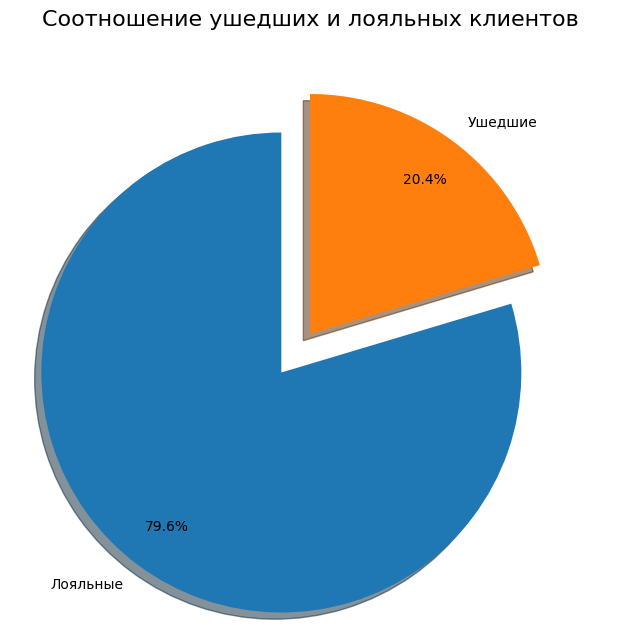

In [45]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
client_count = churn_data['Exited'].value_counts().sort_values(ascending=False) # Сумируем количество ушедших и лояльных клиентов
pie = ax.pie(
    client_count,
    labels=['Лояльные','Ушедшие'], # Подписи для легенды
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.8, # относительное расстояние вдоль радиуса, на котором будет размещен текст, сгенерированный с помощью autopct. 
    shadow=True,
    labeldistance=1.1, # определяет расстояние между центром каждой доли и началом текстовой метки на круговой диаграмме
    counterclock=True, # логическое значение, определяющее направление вращения секторов (по умолчанию True - против часовой стрелки).
    explode = [0.2,0] # массив чисел, определяющих выдвижение секторов из центра диаграммы.
)
title = ax.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)
plt.show(pie)

In [29]:
client_count = churn_data['Exited'].value_counts().sort_values(ascending=False)
fig = px.pie(
    client_count, 
    values='count', 
    names=['Лояльные','Ушедшие'],
    title='Соотношение ушедших и лояльных клиентов')  
fig.show()

Вывод:
1) Отток клиентов составляет 20%, т.е. 1/4 в соотношении с количеством лояльных клиентов.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [157]:
mask = churn_data['Balance'] > 2500 # баланс на счетах клиента в банке больше 2500
filtered = churn_data[mask] # отбираем всех клиентов, у которых баланс больше 2500

In [158]:
fig = px.histogram(
    filtered,
    x = 'Balance', # количественный признак
    marginal = 'box', # дополнительный график: boxplot
    labels = {"Balance": "Баланс"},
    title = 'Распределение баланса пользователей, у которых на счету больше 2 500 долларов'
) 
fig.update_layout(showlegend=False)
fig.show()

Text(0, 0.5, 'Кол. клиентов')

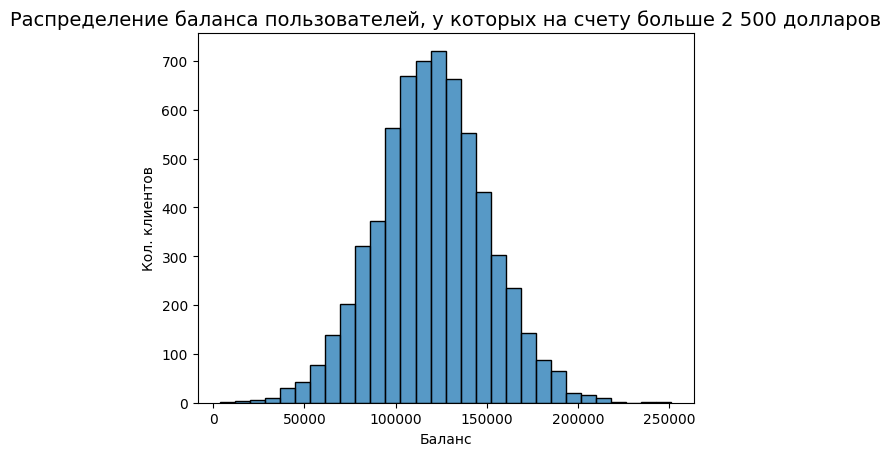

In [159]:
histplot1 = sns.histplot(
    data=filtered, 
    x='Balance', 
    bins=30
)
histplot1.set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов', fontsize=14)
histplot1.set_xlabel('Баланс')
histplot1.set_ylabel('Кол. клиентов')


Краткие выводы: 
1) Баланс большенства клиентов в диапазоне от 100 до 139 тыс. долларов
2) Медиана в данной выборке 120 тыс. долларов

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [176]:
churn_data['client_status'] = churn_data['Exited'] .apply(lambda x: 'loyal' if x == 0 else 'departed') # Делаем признак более явным :)
fig = px.histogram(
    churn_data,
    x = 'Balance', # количественный признак
    color = 'client_status', # категориальный признак
    marginal = 'box', # дополнительный график: boxplot
    labels = {"Balance": "Баланс", "client_status": "Тип клиентов"},
    title = 'Распределение баланса пользователей лояльных и ушедших клиентов'
) 
#fig.update_layout(showlegend=False)
fig.show()
    

Краткие выводы: 
1) Баланс большенства ушедших клиентов распределяется от -2550 до 2500 долларов
2) Также, чуть меньше ушедших клиентов, у которых баланс от 38 до 131 тыс.долларов
3) Медиана по ушедшим клиентам в районе 109 тыс.долларов, а у лояльных в районе 92 тыс. долларов
4) Как и с ушедшими клиентами, большинство лояльных клиентов имеют счет от -2550 до 2500 долларов

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

In [177]:
fig = px.histogram(
    churn_data,
    x = 'Age', # количественный признак
    color = 'client_status', # категориальный признак
    marginal = 'box', # дополнительный график: boxplot
    labels = {"Age": "Возраст", "client_status": "Тип клиентов"},
    title = 'Возраст лояльных и ушедших клиентов',
    histfunc = 'count'
) 
#fig.update_layout(showlegend=False)
fig.show()

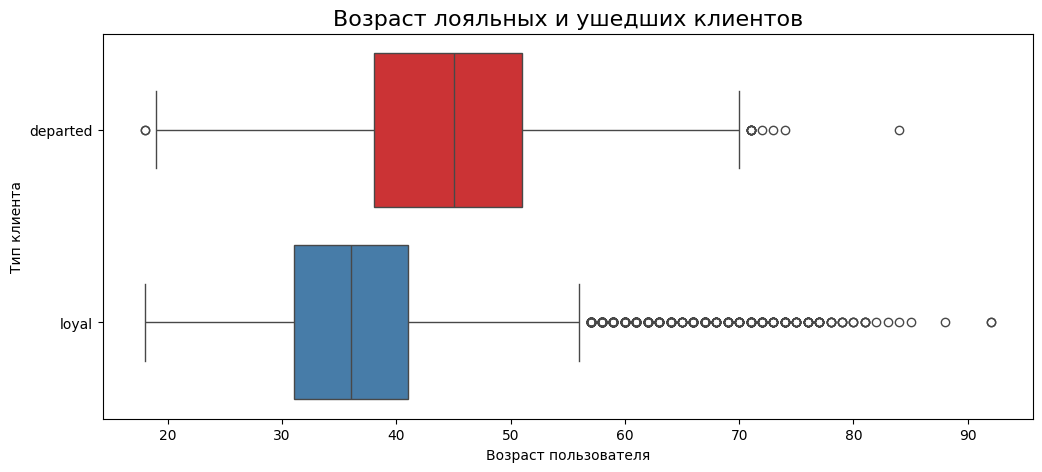

In [186]:
fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(
    churn_data, 
    x='Age', 
    y='client_status', 
    hue = 'client_status'
)
boxplot.set_title('Возраст лояльных и ушедших клиентов', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип клиента');

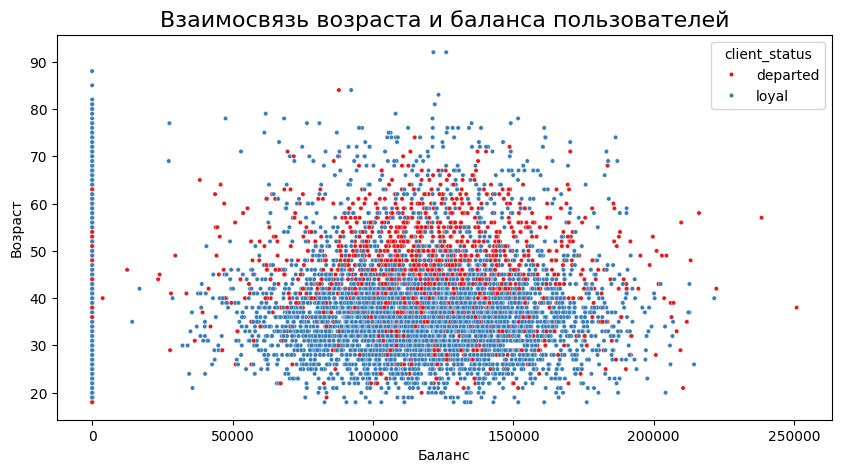

In [217]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='Balance', 
    y='Age', 
    hue = 'client_status',
    s=10,
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь возраста и баланса пользователей', fontsize=16)
scatterplot.set_xlabel('Баланс')
scatterplot.set_ylabel('Возраст');

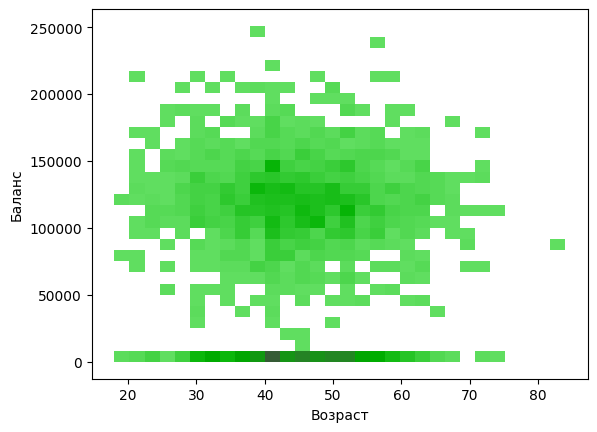

In [220]:
mask = churn_data['Exited'] == 1  # ушедшие клиенты
filtered = churn_data[mask] # отбираем ушедших клиентов


histplot = sns.histplot(
    data=filtered,
    x='Age',
    y='Balance',
    bins=30,
    color='green',
)
histplot.set_xlabel('Возраст')
histplot.set_ylabel('Баланс');

In [225]:
def get_age_group(arg):
    if arg < 40:
        return 'до 40'
    if arg >= 40 and arg <= 60:
        return 'от 40 до 60'
    if arg > 60:
        return 'больше 60'
    
churn_data['Age_group'] = churn_data['Age'].apply(get_age_group)

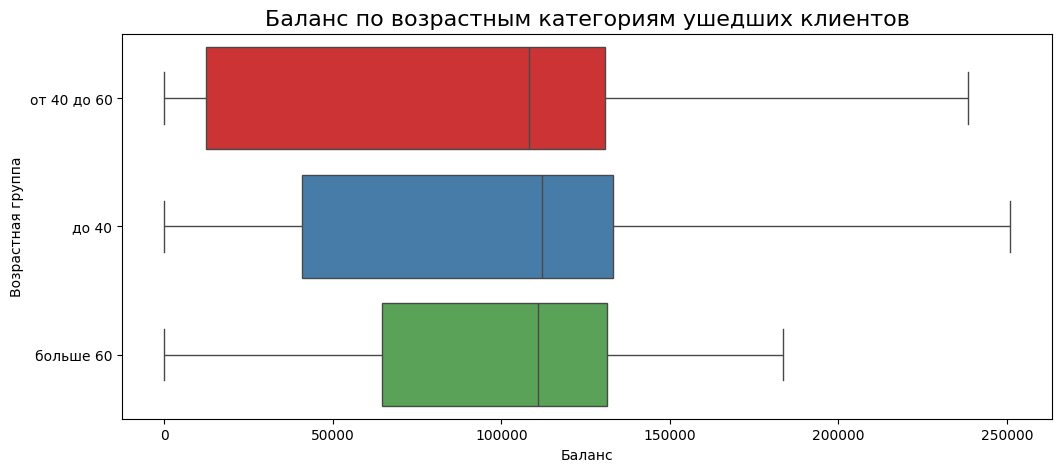

In [231]:
mask = churn_data['Exited'] == 1  # ушедшие клиенты
filtered = churn_data[mask] # отбираем ушедших клиентов

fig = plt.figure(figsize=(12, 5))
boxplot = sns.boxplot(
    filtered, 
    x='Balance', 
    y='Age_group', 
    hue = 'Age_group'
)
boxplot.set_title('Баланс по возрастным категориям ушедших клиентов', fontsize=16)
boxplot.set_xlabel('Баланс')
boxplot.set_ylabel('Возрастная группа');

Выводы:
1) Количество ушедших клиентов смещается в сторону более старшего возраста. Основной возраст ушедших от 38 до 51, в тоже время, возраст большинства лояльных клиентов от 31 до 41
2) Выбросы наблюдаются в группе более старшего возраста, от 57 у лояльных клиентов и после 71 у ушедших.
3) Больше всего выбросов у лояльных клиентов, которые могут быть связаны с социальными и накопительными программами для пенсионеров
4) Стоит обратить больше внимание на клиентов от 38 до 51 года, т.к. в этом возрасте больше всего ушедших клиентов.
5) Также можно заметить, что наибольшее количество клиентов уходит в возрасте 40 лет, но при этом балан на счету незначительный
6) Клиенты в возрасте более 60 лет уходят со значительным балансом на счету. Это может быть связано со смертью клиента.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [221]:
fig = px.histogram(
    churn_data,
    x = 'CreditScore', # количественный признак
    y = 'EstimatedSalary', # количественный признак
    color = 'client_status', # категориальный признак
    marginal = 'box', # дополнительный график: boxplot
    labels = {"CreditScore": "Кредитный рейтинг", "EstimatedSalary": "Предполагаемая заработная плата"},
    title = 'Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты',
    histfunc = 'avg'
) 
#fig.update_layout(showlegend=False)
fig.show()

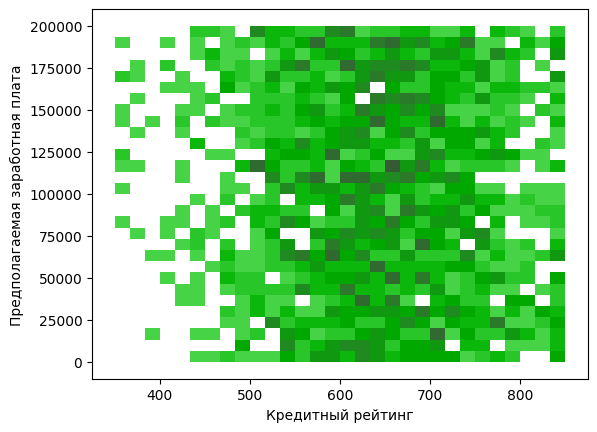

In [212]:
mask = churn_data['Exited'] == 1  # ушедшие клиенты
filtered = churn_data[mask] # отбираем ушедших клиентов


histplot = sns.histplot(
    data=filtered,
    x='CreditScore',
    y='EstimatedSalary',
    bins=30,
    color='green',
)
histplot.set_xlabel('Кредитный рейтинг')
histplot.set_ylabel('Предполагаемая заработная плата');

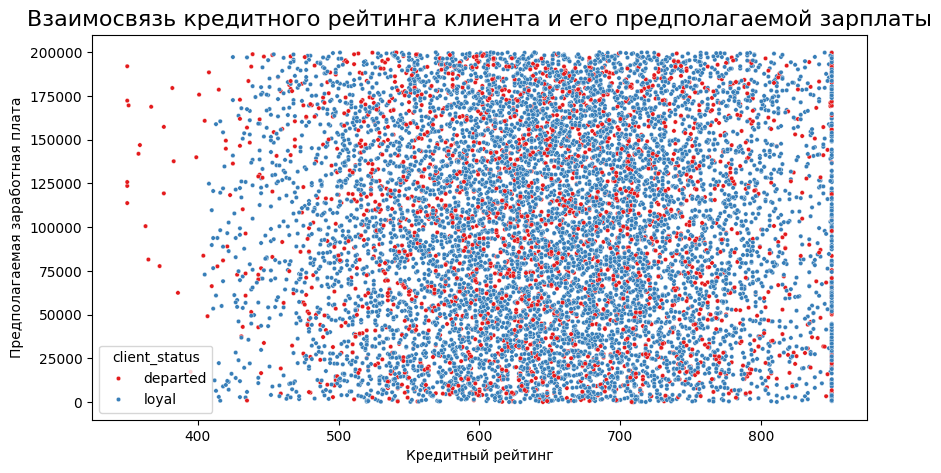

In [241]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=churn_data,
    x='CreditScore', 
    y='EstimatedSalary', 
    hue = 'client_status',
    s=10,
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предполагаемая заработная плата');

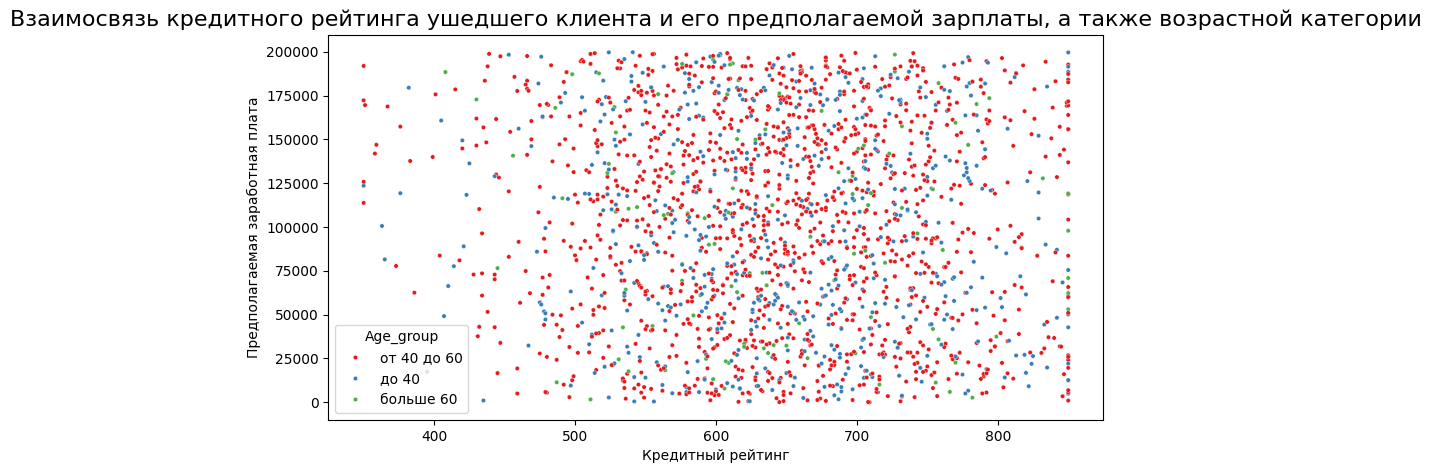

In [243]:
fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=filtered,
    x='CreditScore', 
    y='EstimatedSalary', 
    hue = 'Age_group',
    #size='Age_group',
    s=10,
    sizes=(10, 50)

)
scatterplot.set_title('Взаимосвязь кредитного рейтинга ушедшего клиента и его предполагаемой зарплаты, а также возрастной категории', fontsize=16)
scatterplot.set_xlabel('Кредитный рейтинг')
scatterplot.set_ylabel('Предполагаемая заработная плата');

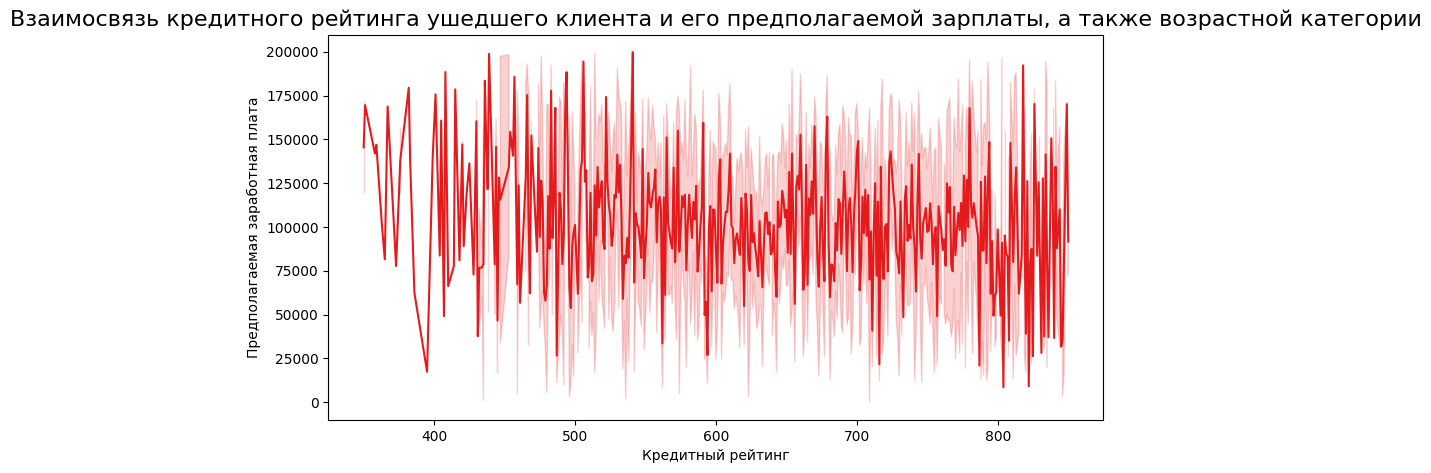

In [252]:
fig = plt.figure(figsize=(10, 5))
lineplot = sns.lineplot(
    filtered,
    x = 'CreditScore',
    y = 'EstimatedSalary',
    estimator=np.mean
)
lineplot.set_title('Взаимосвязь кредитного рейтинга ушедшего клиента и его предполагаемой зарплаты, а также возрастной категории', fontsize=16)
lineplot.set_xlabel('Кредитный рейтинг')
lineplot.set_ylabel('Предполагаемая заработная плата');

Выводы:
1) явной взаимосвязи кредитного рейтинга клиента и его предполагаемой зарплаты не вижу


9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [318]:
#mask = churn_data['Gender'] == 'Male'
#filtered = churn_data[mask]

grouped = churn_data.groupby('Gender')['Exited'].mean()
m1 = grouped['Male']*100
f1 = grouped['Female']*100
print(m1,f1)


16.455928165658786 25.071538630860662


In [317]:

data = dict( 
    labels=['Ж-ушедшие','М-ушедшие'],
    values=grouped
)

# Create a pie chart using Plotly Express
fig = px.pie(
    data, 
    values='values', 
    names='labels', 
    title='Доля ушедших в разрезе пола клиентов',
)

# Show the pie chart
fig.show()

In [284]:
data = churn_data['Gender'].value_counts()
fig = px.pie(
    data, 
    values='count', 
    names=['Male','Female'],
    title='Соотношение клиентов по половому признаку')  
fig.show()

Выводы:
1) Несмотря на то, что клиентов женского пола меньше, отток клиентов женского пола гораздо больше. 

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [372]:
pivot = churn_data.pivot_table(
    values='Balance',
    index='client_status',
    columns='NumOfProducts',
    aggfunc=['count'],
    fill_value=0
)

print(pivot)

              count               
NumOfProducts     1     2    3   4
client_status                     
departed       1409   348  220  60
loyal          3675  4242   46   0


In [394]:
mask = churn_data['Exited'] == 1
grouped1 = churn_data[mask].groupby('NumOfProducts')['client_status'].count()
grouped0 = churn_data[-mask].groupby('NumOfProducts')['client_status'].count()
df = pd.concat([grouped1, grouped0], axis=1,keys=['Ушедшие', 'Лояльные'])

In [397]:

fig=px.bar(df, barmode='group', labels={'NumOfProducts': 'Количество приобретенных услуг', 'value': 'количество клиентов'}, title='Отток клиентов в зависимости от числа приобретённых у банка услуг')
fig.update_layout(legend_title='статус лояльности')
fig.show()

Выводы:
1) Наибольший оттток клиентов по количеству, это клиенты, которые пользуются только одной услугой
2) Если брать соотнрошение общего сичла клиентов и количества ушедших, то больше всего ушло клиентов, у которых приобретено 3 и более услуг
Наименьший отток клиентов, у которых приобретено 2 услуги 
Предложение: 
- Давать возможность приобретать вторую услугу по скидке. 
- посмотреть в сторону улучшения качества оказания услуг и удобства пользования мульте-услугами, тем самым удерживая клиентов, у которых 3 и более приобретенных услуг.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [399]:
grouped = churn_data.groupby('IsActiveMember')['Exited'].mean()
data = dict( 
    labels=['Не активный клиент','Активный клиент'],
    values=grouped
)

# Create a pie chart using Plotly Express
fig = px.pie(
    data, 
    values='values', 
    names='labels', 
    title='Доля ушедших в разрезе статуса активного клиента банка',
)

# Show the pie chart
fig.show()

In [444]:
pivot_table = churn_data.pivot_table(
    values='Exited',
    index='IsActiveMember',
    columns='Age_group',
    aggfunc='mean',
    fill_value=0
)
display(pivot_table)

Age_group,больше 60,до 40,от 40 до 60
IsActiveMember,,,
0,0.820225,0.125968,0.477387
1,0.112000,0.073890,0.267349


In [445]:
pivot_table = pivot_table.reindex(columns=['до 40', 'от 40 до 60', 'больше 60'])
#pivot_table_percent = pivot_table.divide(pivot_table.mean(axis=1), axis=0) * 100
pivot_table_percent = pivot_table * 100

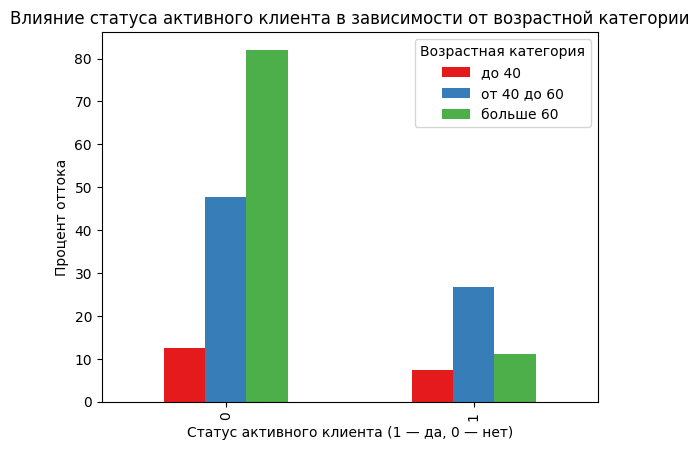

In [451]:
pivot_table_percent.plot(
    kind='bar',
    title='Влияние статуса активного клиента в зависимости от возрастной категории',
    xlabel='Статус активного клиента (1 — да, 0 — нет)',
    ylabel='Процент оттока',
)
plt.legend(title='Возрастная категория')

Выводы:
1) Отток неактивных клиентов почти в два раза превышает отток активных клиентов
2) максимальный отток по неактивным клиентам в возрастной группе от 60 лет, что скорее всего связано со смертью клиента
3) на втором месте, это отток неактивных клиентов от 40 до 60 лет, что может быть связано с отсутствием основного дохода и выходом на пенсию.
Предложение: Чтобы уменьшить отток клиентов среди неактивных, необходимо заинтересовать дополнительными банковскими продуктами. Особое внимание обратить на категорию от 40 до 60 лет, где можно предложить продукты для пенсионеров и пожилых людей после 40.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [481]:
grouped = churn_data.groupby('Geography')['Exited'].mean().reset_index()
grouped['Exited']  = grouped['Exited'] * 100
grouped.info()
display(grouped)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Geography  3 non-null      object 
 1   Exited     3 non-null      float64
dtypes: float64(1), object(1)
memory usage: 176.0+ bytes


,Geography,Exited
0,France,16.154767
1,Germany,32.443204
2,Spain,16.673395


In [485]:

fig = px.choropleth(
    grouped, 
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    projection='equirectangular', 
    title='Доля ушедших клиентов на карте мира',
    labels={'Exited': 'Доля ушедших'}
)
fig.show()

Выводы:
1) Больше всего ушедших клиентов в Германии. Это может быть связано с тем, что какие-то услуги были очень привлекательны для клиентов, но со временем потребность в услуге уменьшилась или исчезла. Это могут быть какие-то ранеее предоставляемые льготные кридиты, которые клиенты выплатили и ушли из банка.
Для выяснения более явных причины оттока в Германии желательно посмотреть на ушедших клиентов в в разных разрезах.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

In [486]:
# Функция перевода числового признака CreditScore в категориальный
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

In [487]:
pivot_table = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0
)
display(pivot_table)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


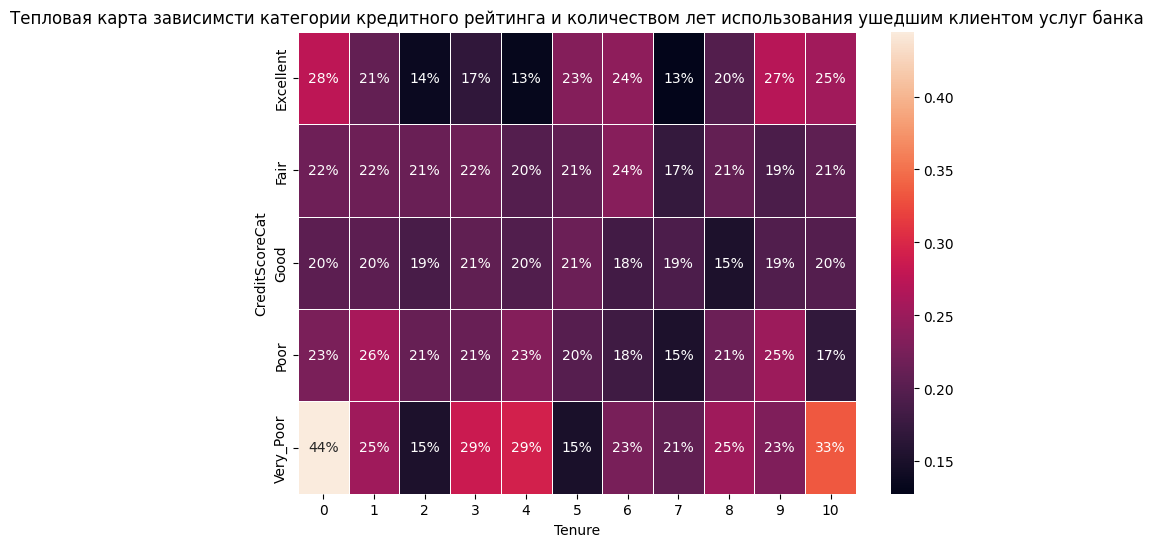

In [499]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(
    pivot_table, 
    annot=True, 
    linewidths=.5, 
    ax=ax,
    fmt='.0%'
)
plt.title('Тепловая карта зависимсти категории кредитного рейтинга и количеством лет использования ушедшим клиентом услуг банка');

Вывод:
1) Чаще всего уходят клиенты с низким кредитным рейтингом в первый год.
2) Клиенты с категорией рейтинга Very_Poor чаще уходят, чем клиенты с другой категорией рейтинга
3) Также увеличенный отток мы видем у клиентов с низким кредитным рейтингом на 10 году использования услуг банка